In [ ]:
# ------------------------------- PROYECTO FINAL: TEMA: SUICIDIOS ------------------------------- #

In [ ]:
# Primero, cargaremos todas las librerias necesarias para trabajar en nuestro proyecto final. Entiendo que
# puedo estar cargando mas de lo necesario, pero en estas circunstancias es mejor que sobre a que falte.

In [ ]:
# Importar las librerias más que necesarias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# A continuacion cargaremos las bases de datos. En esta primera instancia, cargaré mas de una porque
# quiero primero explorar los datos antes de tomar la decision sobre cuál trabajar.

In [ ]:
# ===================== Primera base de datos: Suicidios en China ===================== #

In [ ]:
df_China = pd.read_csv("/content/SuicideChina.csv")

In [ ]:
df_China.head()

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [ ]:
df_China.shape

(2571, 12)

In [ ]:
df_China.duplicated().sum()

0

In [ ]:
df_China.isna().sum()

Unnamed: 0      0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64

In [ ]:
df_China.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [ ]:
df_China["method"].value_counts()

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [ ]:
df_China["Died"].value_counts()

no     1315
yes    1256
Name: Died, dtype: int64

In [ ]:
df_China["Year"].value_counts()

2010    956
2011    866
2009    749
Name: Year, dtype: int64

In [ ]:
df_China["Sex"].value_counts()

female    1328
male      1243
Name: Sex, dtype: int64

In [ ]:
df_China["Age"].describe()

count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64

In [ ]:
# Me resulta bastante interesante este dataset.

In [ ]:
# ===================== Segunda base de datos: Suicidios Rate ===================== #

In [ ]:
df_rate = pd.read_csv("/content/Suicide_Rate.csv")

In [ ]:
df_rate.head()

,ParentLocation,Location,Period,Sex,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
0,Africa,Angola,2019,Both sexes,12.55,7.70,19.43
1,Africa,Angola,2019,Male,21.71,13.48,33.23
2,Africa,Angola,2019,Female,4.68,2.74,7.49
3,Africa,Angola,2018,Both sexes,12.35,7.58,19.05
4,Africa,Angola,2018,Male,21.28,13.21,32.49


In [ ]:
df_rate["ParentLocation"].value_counts()

Europe                   3000
Africa                   2820
Americas                 1980
Eastern Mediterranean    1260
Western Pacific          1260
South-East Asia           660
Name: ParentLocation, dtype: int64

In [ ]:
df_rate.loc[(df_rate['Location'] == "China")].describe()

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,60.000000,60.000000,60.000000,60.000000
mean,2009.500000,10.030833,7.924500,12.043000
std,5.814943,3.017365,2.140704,3.465703
min,2000.000000,4.800000,3.760000,5.940000
25%,2004.750000,7.575000,6.290000,9.060000
50%,2009.500000,9.825000,8.090000,12.050000
75%,2014.250000,12.530000,9.900000,14.892500
max,2019.000000,15.480000,12.640000,18.030000


In [ ]:
# En este codigo que no me gustó tanto tengo 60 datos de China. Pero las demas columnas siento que
# no me proporcionan informacion relevante que pudiera añadir al database original.

In [ ]:
# ===================== Segunda base de datos: Master (suicidios) ===================== #

In [ ]:
df_master = pd.read_csv("/content/master.csv")

In [ ]:
df_master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
df_master.shape

(27820, 12)

In [ ]:
df_master["country"].value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [ ]:
df_master.loc[(df_master['country'] == "China")].describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_master["year"].value_counts()

2009    1068
2010    1056
2001    1056
2002    1032
2000    1032
2011    1032
2007    1032
2003    1032
2008    1020
2006    1020
2004    1008
2005    1008
1999     996
2012     972
2013     960
1998     948
1995     936
2014     936
1997     924
1996     924
1994     816
1993     780
1992     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [ ]:
# Pense que podia de alguna forma vincular esta base de datos con la de los suicidios en China, pero no me
# reconoce el pais China cuando intento buscarlo.

In [ ]:
" ===================== Conclusion: Suicidios en China ===================== "

# Una vez explorada las bases de datos, la decision final es que se va a trabajar sobre la base que se
# titula Suicidios en China.

' ===================== Conclusion: Suicidios en China ===================== '

In [ ]:
# ****************************************************************************************************************
# ===================================== Primera parte: Revision de la Data ===================================== #
# ****************************************************************************************************************

In [ ]:
df = pd.read_csv("/content/SuicideChina.csv")

In [ ]:
df.head(10)

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
5,6,6,no,yes,no,2009,11,male,62,iliterate,farming,Pesticide
6,7,7,no,yes,no,2010,1,female,90,iliterate,farming,Pesticide
7,8,8,yes,no,no,2010,10,male,54,Secondary,farming,Pesticide
8,9,9,no,yes,no,2010,7,male,66,primary,farming,Hanging
9,10,10,yes,no,no,2011,1,female,30,Secondary,others/unknown,Poison unspec


In [ ]:
df.shape

(2571, 12)

In [ ]:
df["Hospitalised"].value_counts()

yes    1553
no     1018
Name: Hospitalised, dtype: int64

In [ ]:
df["Died"].value_counts()

no     1315
yes    1256
Name: Died, dtype: int64

In [ ]:
df["Urban"].value_counts()

no         2213
yes         277
unknown      81
Name: Urban, dtype: int64

In [ ]:
df["Year"].value_counts()

2010    956
2011    866
2009    749
Name: Year, dtype: int64

In [ ]:
df["Month"].value_counts()

6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64

In [ ]:
df["Sex"].value_counts()

female    1328
male      1243
Name: Sex, dtype: int64

In [ ]:
df["Age"].describe()

count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64

In [ ]:
df["Education"].value_counts()

Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64

In [ ]:
df["Occupation"].value_counts()

farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64

In [ ]:
df["method"].value_counts()

Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64

In [ ]:
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

In [ ]:
df.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


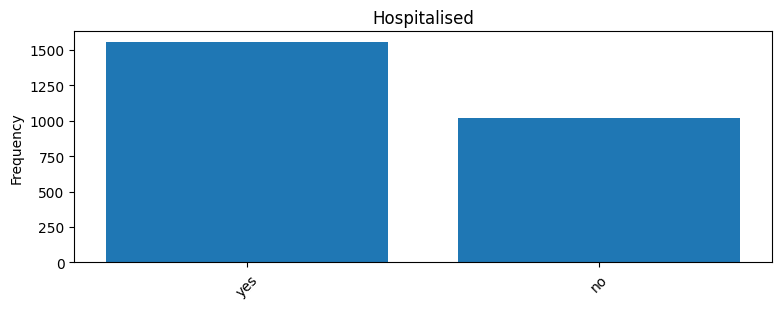

Hospitalised: 
 yes    1553
no     1018
Name: Hospitalised, dtype: int64


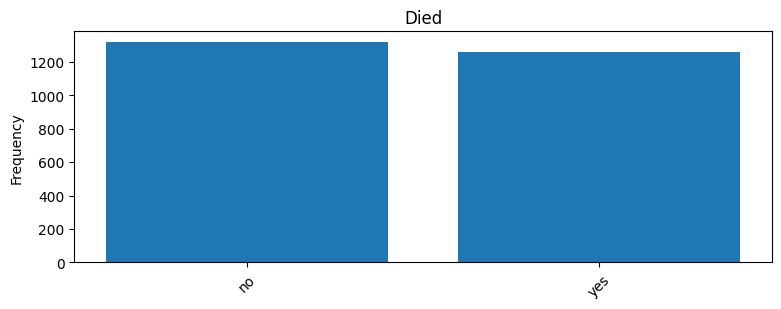

Died: 
 no     1315
yes    1256
Name: Died, dtype: int64


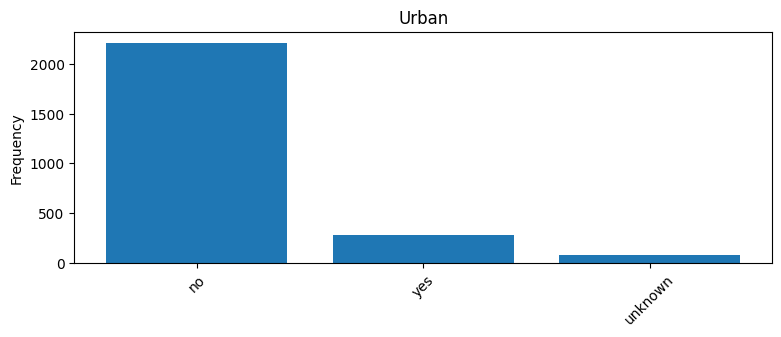

Urban: 
 no         2213
yes         277
unknown      81
Name: Urban, dtype: int64


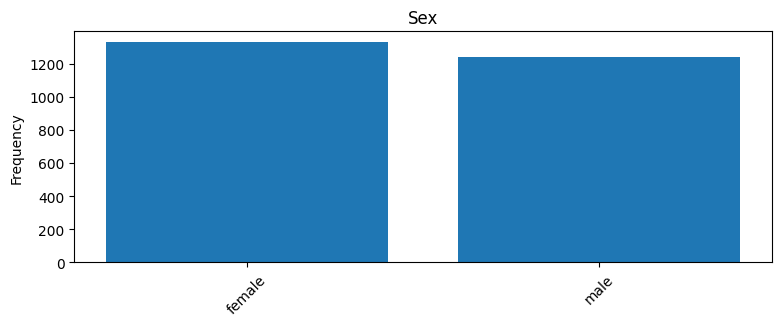

Sex: 
 female    1328
male      1243
Name: Sex, dtype: int64


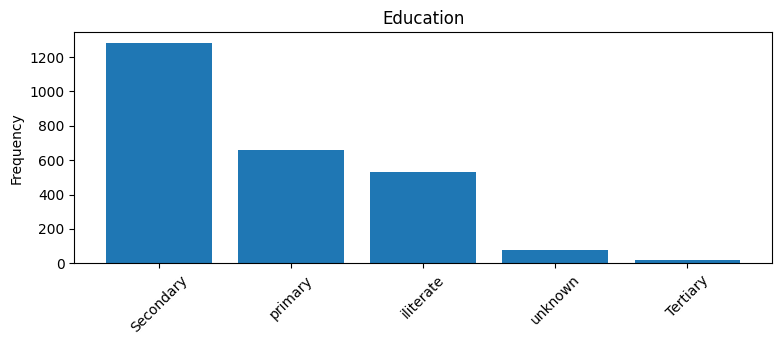

Education: 
 Secondary    1280
primary       659
iliterate     533
unknown        80
Tertiary       19
Name: Education, dtype: int64


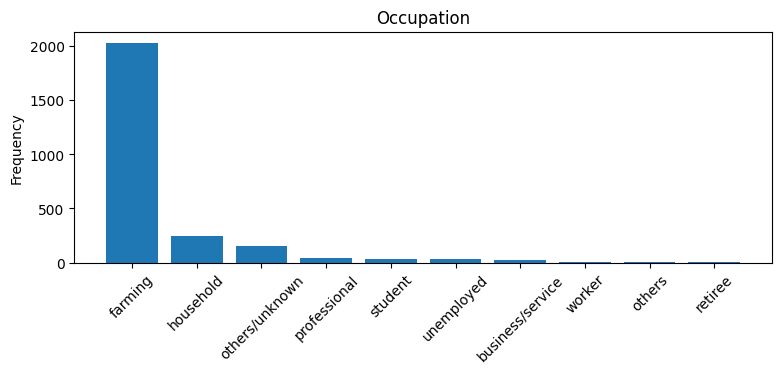

Occupation: 
 farming             2032
household            248
others/unknown       156
professional          37
student               35
unemployed            30
business/service      21
worker                 6
others                 3
retiree                3
Name: Occupation, dtype: int64


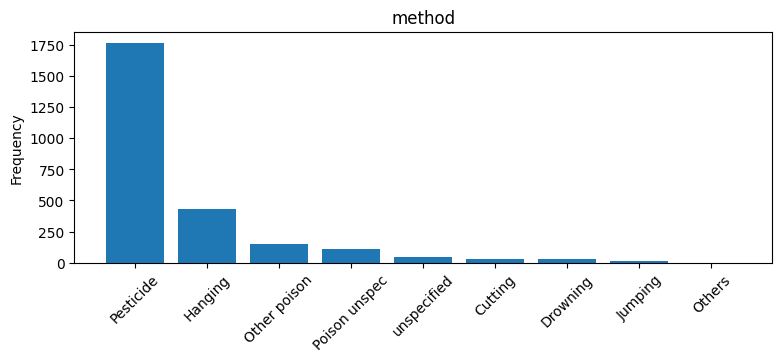

method: 
 Pesticide        1768
Hanging           431
Other poison      146
Poison unspec     107
unspecified        48
Cutting            29
Drowning           26
Jumping            15
Others              1
Name: method, dtype: int64


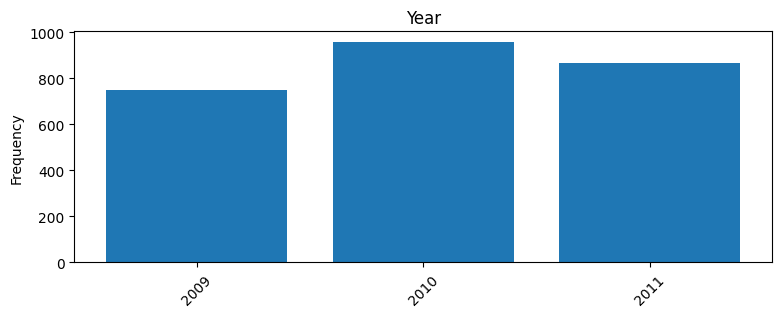

Year: 
 2010    956
2011    866
2009    749
Name: Year, dtype: int64


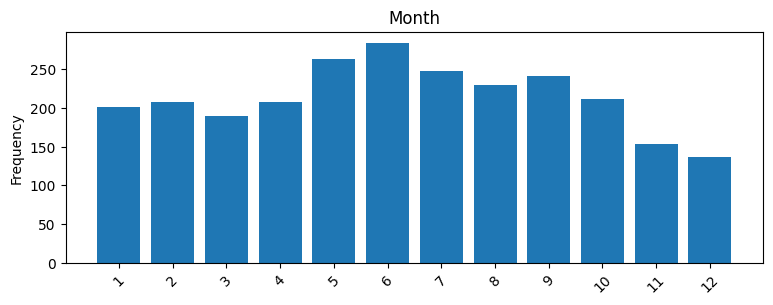

Month: 
 6     284
5     263
7     247
9     241
8     229
10    211
2     208
4     208
1     201
3     190
11    153
12    136
Name: Month, dtype: int64


In [ ]:
def bar_plot(variable):
    """
    input: variable ex: "Sex"
    output: bar plot & Value count.
    """
    # get feature.
    var = df[variable]
    # count number of categorical variable(value / sample)
    varValue = var.value_counts()

    #visualization
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values, rotation = 45)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))
category1 = ["Hospitalised","Died","Urban", "Sex", "Education", "Occupation","method", "Year", "Month"]
for c in category1:
    bar_plot(c)

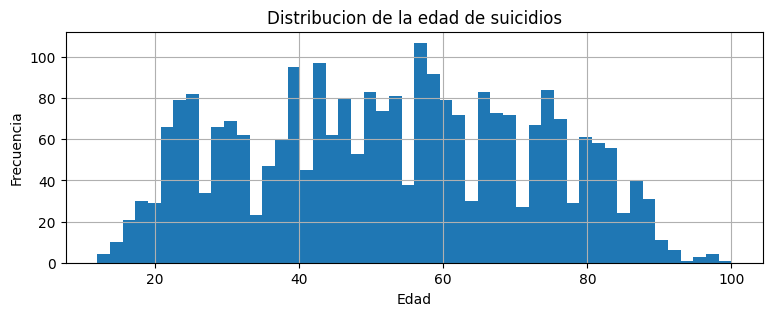

In [ ]:
plt.figure(figsize = (9,3))
plt.hist(df["Age"], bins = 50)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribucion de la edad de suicidios")
plt.grid()
plt.show()

In [ ]:
df.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [ ]:
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

In [ ]:
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

In [ ]:
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

In [ ]:
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

In [ ]:
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

In [ ]:
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

In [ ]:
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [ ]:
df.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,0,0,2010,12,1,39,2,2,3
1,0,1,0,2009,3,0,83,1,1,2
2,0,1,0,2010,2,0,60,1,1,2
3,0,1,0,2011,1,0,73,1,1,2
4,1,0,0,2009,8,0,51,2,1,1


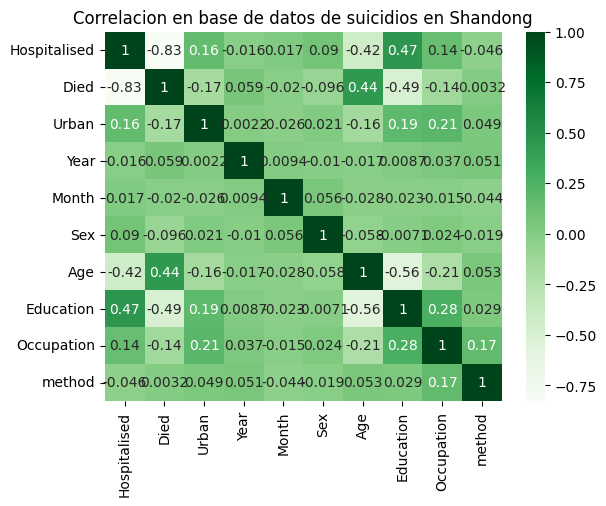

In [ ]:
Correlacion = df.corr()
sns.heatmap(Correlacion, cmap='Greens', annot=True)
plt.title("Correlacion en base de datos de suicidios en Shandong")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Hospitalised  2571 non-null   int64
 1   Died          2571 non-null   int64
 2   Urban         2571 non-null   int64
 3   Year          2571 non-null   int64
 4   Month         2571 non-null   int64
 5   Sex           2571 non-null   int64
 6   Age           2571 non-null   int64
 7   Education     2571 non-null   int64
 8   Occupation    2571 non-null   int64
 9   method        2571 non-null   int64
dtypes: int64(10)
memory usage: 201.0 KB


In [ ]:
# Hasta aqui, terminamos de revisar los datos. Estos estan bien, son todos integer, no hay missing
# value, no hay NaN, no hay datos duplicados. Podemos aplicar modelos.

In [ ]:
# ****************************************************************************************************************
# ================================ Segunda parte: Metrica y Modelos Aplicados ================================ #
# ****************************************************************************************************************

In [ ]:
" ===================== Primer Modelo: Arboles de Decisión ===================== "

' ===================== Primer Modelo: Arboles de Decisión ===================== '

In [ ]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [ ]:
# Variable objetivo: "Died"

y = df['Died']
X = df.drop(columns = 'Died')

In [ ]:
# Hacemos el test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Aplicamos el modelo de arboles de decision

DecisionTreeClassifier,
dec_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Ajustamos el modelo utilizando los datos de entrenamiento

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predecir los valores objetivos para el conjunto de entrenamiento y de prueba.

train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
# Y finalmente toca evaluar el modelo:

train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9984439834024896
0.8444790046656299


In [ ]:
" ===================== Segundo Modelo: Random Forest ===================== "

' ===================== Segundo Modelo: Random Forest ===================== '

In [ ]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [ ]:
# Ordenen los datos en matriz de características y vector objetivo

X = df.drop(columns = 'Died')
y = df['Died']

# Dividan los datos para la validación

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Aplicamos el modelo

rf = RandomForestClassifier(random_state = 42)

In [ ]:
# Vemos hiperparametros

rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Aprende relacion entre X e y

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predecir los valores para y

rf.predict(X_test)

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [ ]:
# Evaluar el modelo

rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9984439834024896
0.8724727838258165


In [ ]:
# Afinaremos el modelo porque parece estar sobreajustado

In [ ]:
rf_2 = RandomForestClassifier(max_depth = 2, random_state = 42)
rf_2.fit(X_train, y_train)
rf_2_train_score = rf_2.score(X_train, y_train)
rf_2_test_score = rf_2.score(X_test, y_test)
print(rf_2_train_score)
print(rf_2_test_score)

0.9154564315352697
0.8833592534992224


In [ ]:
# Ahí se ve mejor. Y el resultado se parece mucho a con el modelo anterior.

In [ ]:
" ===================== Tercero Modelo: Redes Neuronales ===================== "

' ===================== Tercero Modelo: Redes Neuronales ===================== '

In [ ]:
# Correré la base de datos de nuevo y todo lo modificado para comenzar a trabajar con el otro modelo.

# Cargamos la base de datps
df = pd.read_csv("/content/SuicideChina.csv")

# Eliminamos las columnas innecesarias
df = df.drop(columns = ['Unnamed: 0', 'Person_ID'])

# Cambiamos las columnas que son categoricas como valores numericos:

# Si fue Hospitalizado o no
df["Hospitalised"]= df["Hospitalised"].replace("yes", 1)
df["Hospitalised"]= df["Hospitalised"].replace("no", 0)

# Si falleció o no
df["Died"]= df["Died"].replace("yes", 1)
df["Died"]= df["Died"].replace("no", 0)

# si vivia en una zona urbana o rural
df["Urban"]= df["Urban"].replace("yes", 1)
df["Urban"]= df["Urban"].replace("no", 0)
df["Urban"]= df["Urban"].replace("unknown", 2)

# De qué genero era
df["Sex"]= df["Sex"].replace("female", 1)
df["Sex"]= df["Sex"].replace("male", 0)

# La educación que tenía
df["Education"]= df["Education"].replace("iliterate", 0)
df["Education"]= df["Education"].replace("primary", 1)
df["Education"]= df["Education"].replace("Secondary", 2)
df["Education"]= df["Education"].replace("Tertiary", 3)
df["Education"]= df["Education"].replace("unknown", 4)

# A qué se dedicaba
df["Occupation"]= df["Occupation"].replace("farming", 1)
df["Occupation"]= df["Occupation"].replace("household", 2)
df["Occupation"]= df["Occupation"].replace("others/unknown", "others")
df["Occupation"]= df["Occupation"].replace("others", 3)
df["Occupation"]= df["Occupation"].replace("professional", 4)
df["Occupation"]= df["Occupation"].replace("student", 5)
df["Occupation"]= df["Occupation"].replace("unemployed", 6)
df["Occupation"]= df["Occupation"].replace("business/service", 7)
df["Occupation"]= df["Occupation"].replace("worker", 8)
df["Occupation"]= df["Occupation"].replace("retiree", 9)

# El metodo que escogio para cometer suicidio (o intento de suicidio)
df["method"]= df["method"].replace("Pesticide", 1)
df["method"]= df["method"].replace("Hanging", 2)
df["method"]= df["method"].replace("Other poison", "Poison unspec")
df["method"]= df["method"].replace("Poison unspec", 3)
df["method"]= df["method"].replace("unspecified", 4)
df["method"]= df["method"].replace("Cutting", 5)
df["method"]= df["method"].replace("Drowning", 6)
df["method"]= df["method"].replace("Jumping", 7)
df["method"]= df["method"].replace("Others", 4)

In [ ]:
# Vamos a escalar los datos, para prepararlos para el modelo:

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()

,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,0.809633,-0.977309,-0.377489,-0.057513,1.780720,0.967468,-0.689123,0.649998,0.488736,1.398833
1,-1.235128,1.023218,-0.377489,-1.321323,-1.030118,-1.033626,1.535342,-0.430950,-0.401165,0.432578
2,-1.235128,1.023218,-0.377489,-0.057513,-1.342434,-1.033626,0.372553,-0.430950,-0.401165,0.432578
3,-1.235128,1.023218,-0.377489,1.206297,-1.654749,-1.033626,1.029782,-0.430950,-0.401165,0.432578
4,0.809633,-0.977309,-0.377489,-1.321323,0.531458,-1.033626,-0.082451,0.649998,-0.401165,-0.533676


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

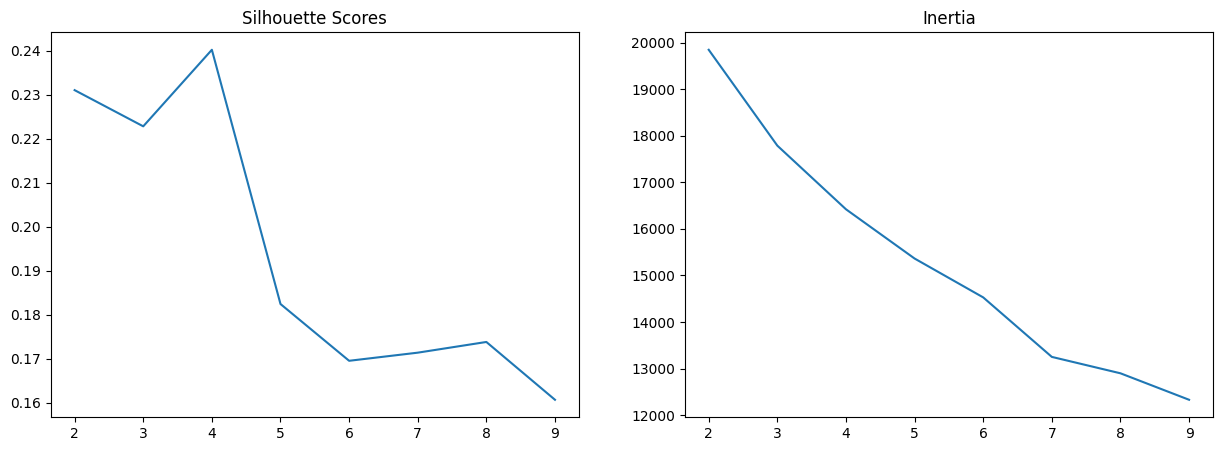

In [ ]:
# Lo que hacemos ahora es crear el grafico del codo y el de silluete para saber el numero de clusteres optimos.

ks = range(2,10)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [ ]:
# Ahora aplicamos el modelo kmeans con 4 clusteres:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Agregamos el numero de clusteres al dataframe en su propia columna.
df['cluster'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method,cluster
0,1,0,0,2010,12,1,39,2,2,3,1
1,0,1,0,2009,3,0,83,1,1,2,3
2,0,1,0,2010,2,0,60,1,1,2,3
3,0,1,0,2011,1,0,73,1,1,2,3
4,1,0,0,2009,8,0,51,2,1,1,1


In [ ]:
# Lo que hacemos ahora, es que agrupamos el dataframe de acuerdo a los clusters (los 4 escogidos) y hacemos que nos muestre el promedio de cada columna (esto es para
# tener una idea mas general de los valores).

cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,0,0.717742,0.427419,0.459677,2010.137097,6.362903,0.419355,33.250000,2.008065,5.580645,2.048387
1,1,0.999100,0.073807,0.000000,2010.037804,6.471647,0.565257,45.600360,1.795680,1.306031,1.459046
2,2,0.932806,0.150198,1.280632,2009.972332,5.873518,0.569170,42.201581,2.067194,1.588933,1.743083
3,3,0.108957,1.000000,0.053555,2010.060018,6.212373,0.465374,64.498615,0.765466,1.094183,1.546630


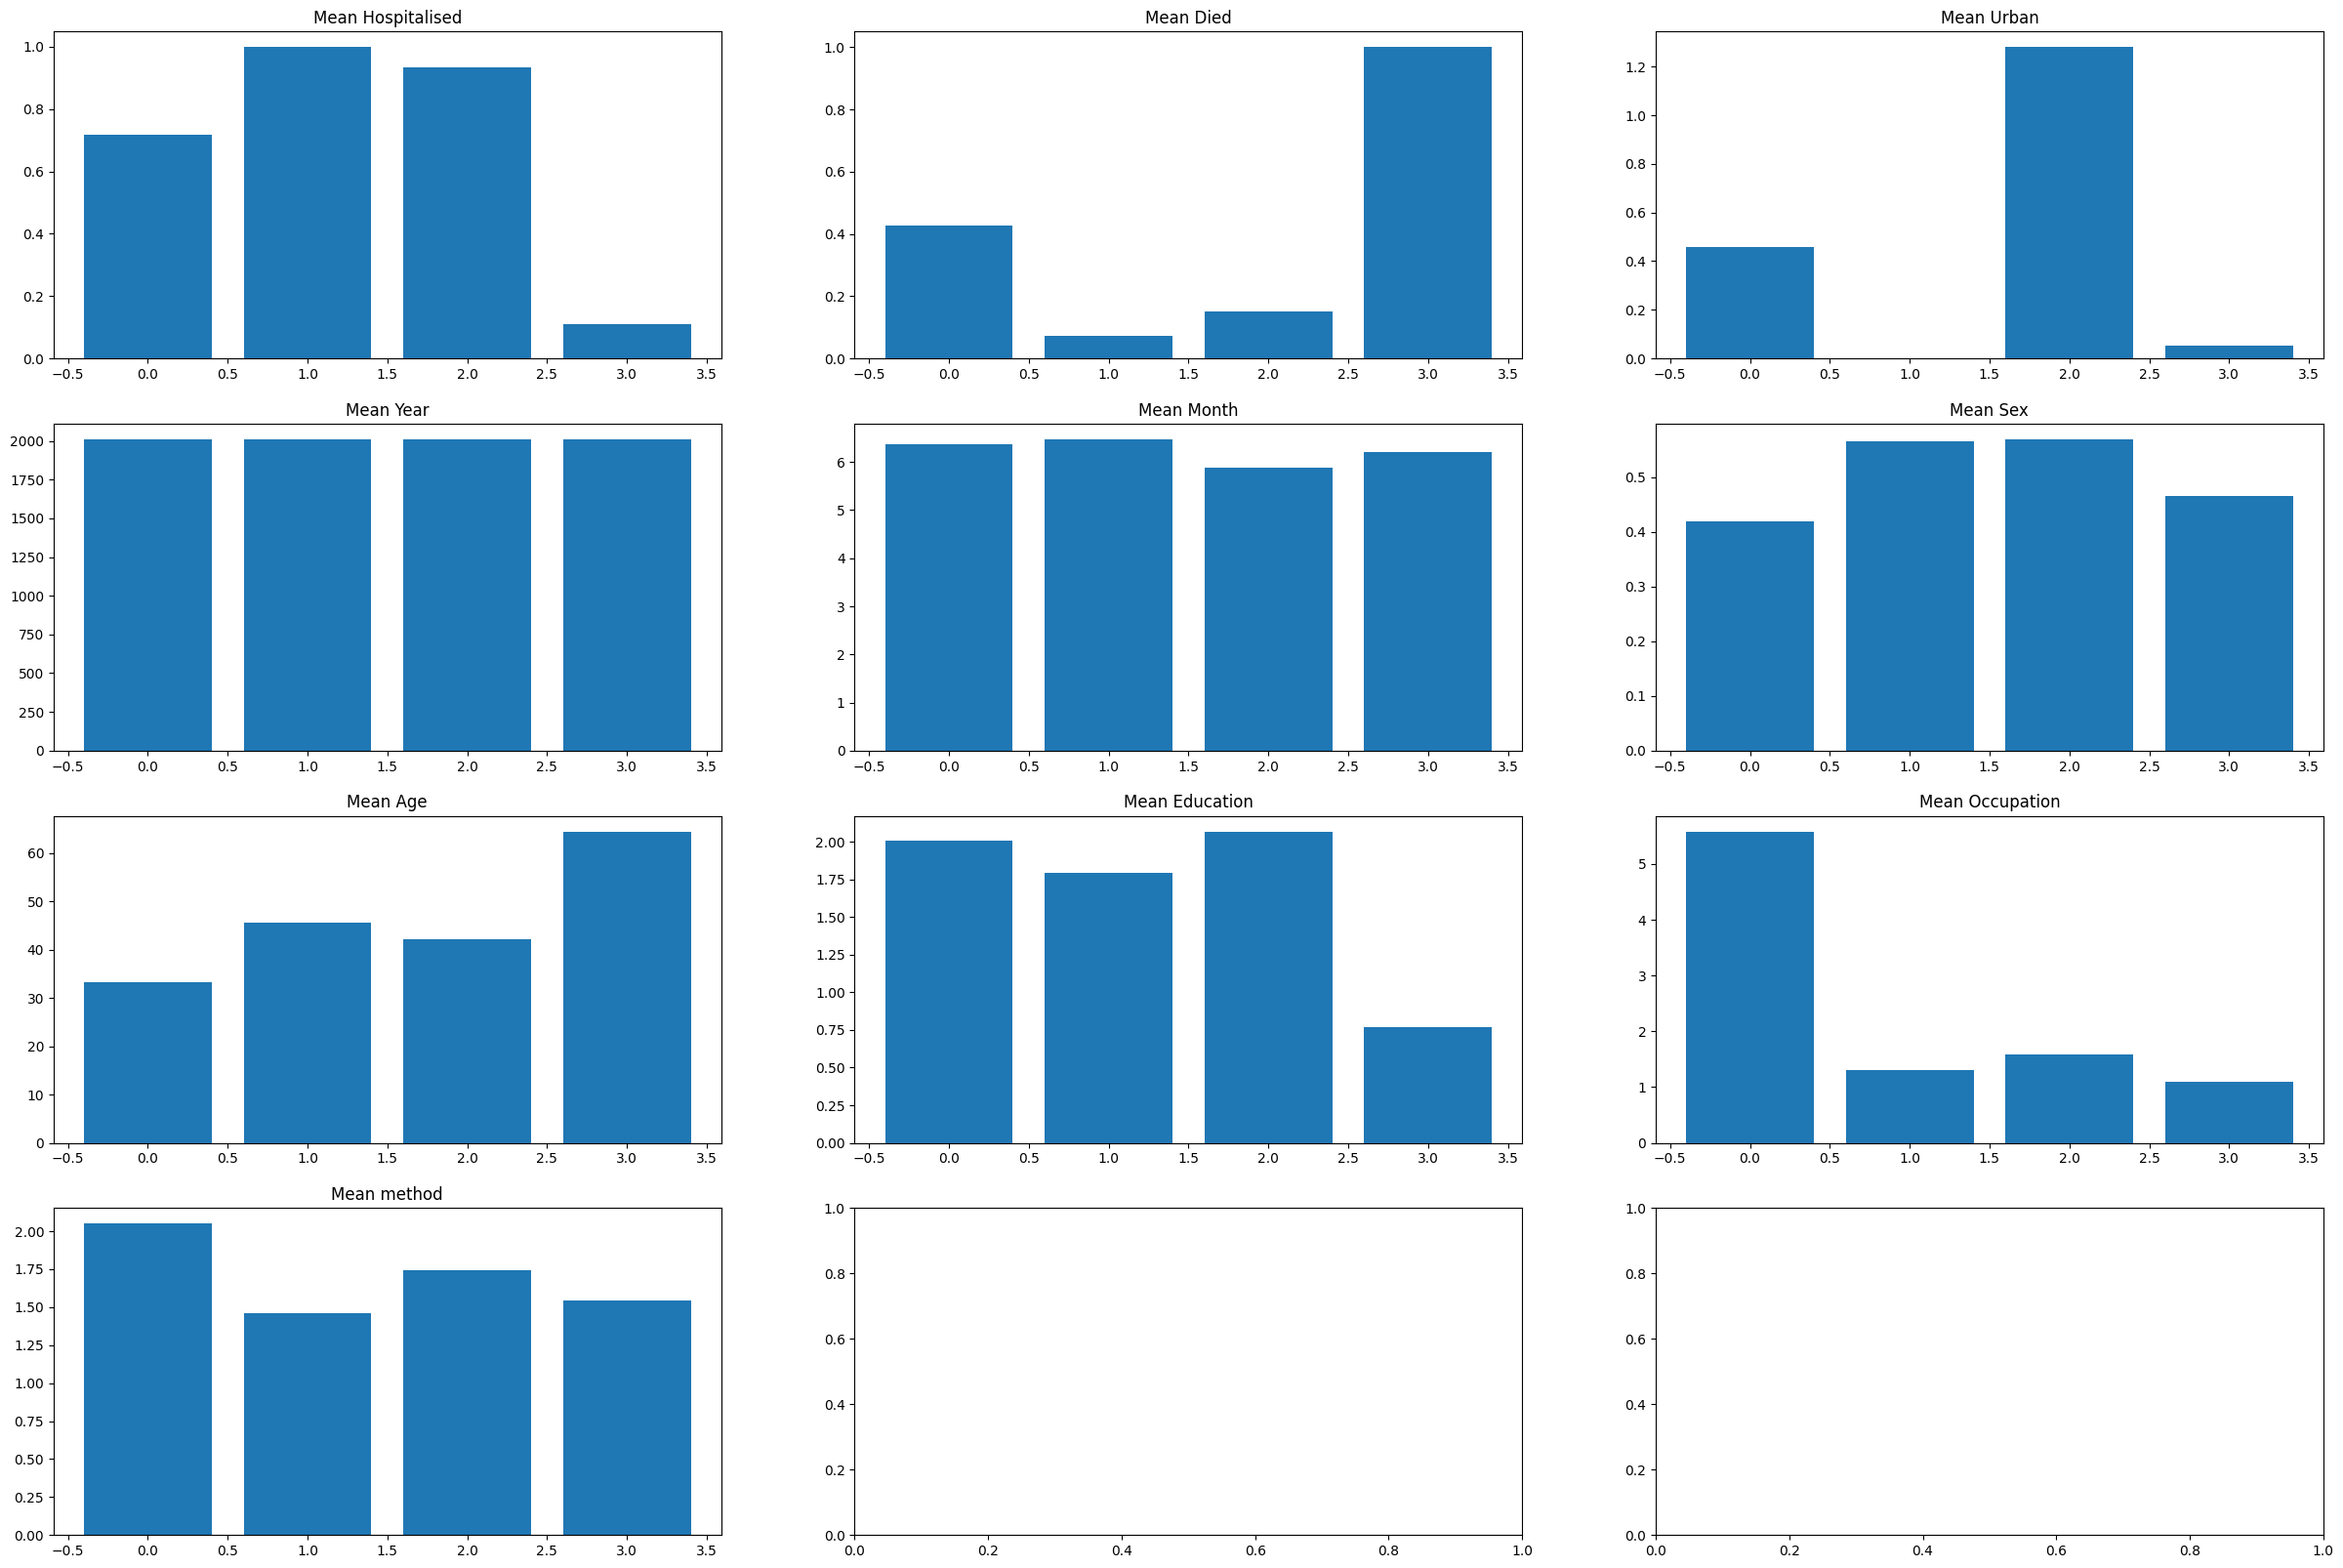

In [ ]:
# Graficamos los clusteres obtenidos.

fig, axes = plt.subplots(4,3, figsize = (30, 20))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [ ]:
# Ahora vamos a las redes neuronales, antes era kmeans

In [ ]:
# 1) Separación

X = df.drop(columns = 'Died')
y = df['Died']

In [ ]:
# 2) Escalar

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

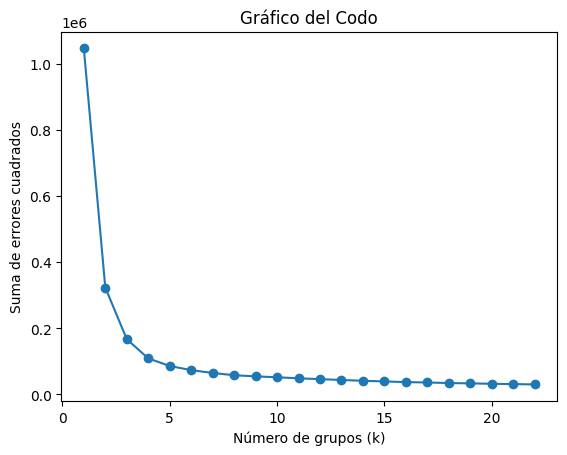

In [ ]:
sse = [] # Suma de errores cuadrados

for k in range(1, 23):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.plot(range(1, 23), sse, marker='o')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Gráfico del Codo')
plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

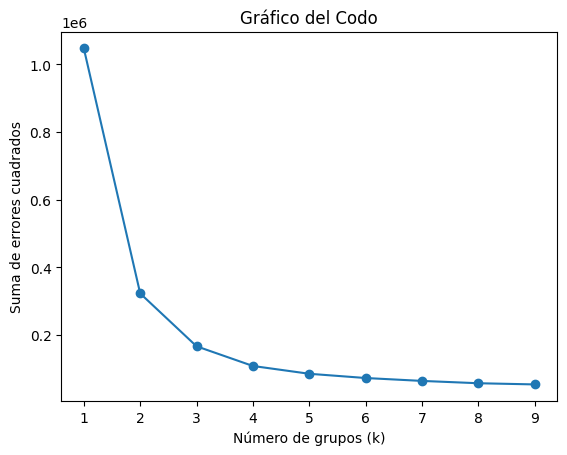

In [ ]:
sse = [] # Suma de errores cuadrados

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Graficar el gráfico del codo
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Número de grupos (k)')
plt.ylabel('Suma de errores cuadrados')
plt.title('Gráfico del Codo')
plt.show();

In [ ]:
# Ahora podemos dividir los datos con el test train split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Creamos un pipeline. Ya escalamos los datos y este paso es bueno para evitar fugas.

transformer = make_pipeline(StandardScaler())

In [ ]:
# Un pipeline dentro de otro añadiendole la regresion logistica.

logreg = LogisticRegression()
logreg_pipe = make_pipeline(transformer, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler())])),
                ('logisticregression', LogisticRegression())])

In [ ]:
print('Training accuracy:', logreg_pipe.score(X_train, y_train))
print('Testing accuracy:', logreg_pipe.score(X_test, y_test))

Training accuracy: 0.9590248962655602
Testing accuracy: 0.9346811819595645


In [ ]:
# Debemos definir nuestra estructura de red. Tenemos 7 columnas, por lo que ese será el maximo de neuronas en la primera capa.

input_shape = X_train.shape[1]
input_shape

10

In [ ]:
# En el examen, nos piden que utilicemos un modelo secuencial:

model = Sequential()

In [ ]:
# Primera capa oculta
model.add(Dense(10, # Tengo 10 neuronas en mi primera capa
                input_dim = input_shape,
                activation = 'relu'))
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 6ms/step - loss: 547.7231 - val_loss: 413.1172
Epoch 2/10
61/61 [==============================] - 0s 4ms/step - loss: 315.9663 - val_loss: 204.5061
Epoch 3/10
61/61 [==============================] - 0s 3ms/step - loss: 114.1504 - val_loss: 19.1106
Epoch 4/10
61/61 [==============================] - 0s 3ms/step - loss: 5.5125 - val_loss: 4.0721
Epoch 5/10
61/61 [==============================] - 0s 3ms/step - loss: 4.0996 - val_loss: 4.0675
Epoch 6/10
61/61 [==============================] - 0s 3ms/step - loss: 3.9902 - val_loss: 3.7789
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 3.8648 - val_loss: 3.9362
Epoch 8/10
61/61 [==============================] - 0s 3ms/step - loss: 3.7868 - val_loss: 3.6341
Epoch 9/10
61/61 [==============================] - 0s 3ms/step - loss: 3.6271 - val_loss: 3.4593
Epoch 10/10
61/61 [==============================] - 0s 3ms/step - loss: 3.4772 - val_loss: 3.3438


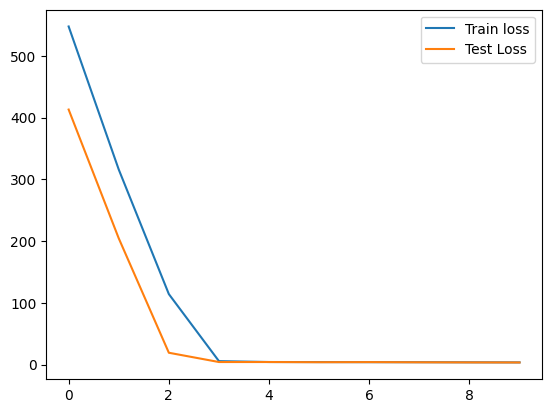

In [ ]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 2ms/step - loss: 3.3438


3.343798875808716

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 2ms/step


0.7508090614886731

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 2ms/step


0.7122861586314152

In [ ]:
# ===== Segunda version de redes neuronales =====

In [ ]:
# Primera capa oculta
model.add(Dense(10, # Tengo 70 neuronas en mi primera capa
                input_dim = input_shape,
                activation = 'relu'))
# Segunda capa oculta
model.add(Dense(7, # Tengo 4 neuronas en mi segunda capa.
                activation = 'relu'))
# Tercera capa oculta
model.add(Dense(4, # Tengo 4 neuronas en mi segunda capa.
                activation = 'relu'))
# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 3s 6ms/step - loss: 0.6934 - val_loss: 0.6926
Epoch 2/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6925
Epoch 3/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6932 - val_loss: 0.6925
Epoch 4/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6932 - val_loss: 0.6926
Epoch 5/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6927
Epoch 6/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6932 - val_loss: 0.6927
Epoch 7/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6928
Epoch 8/10
61/61 [==============================] - 0s 4ms/step - loss: 0.6931 - val_loss: 0.6926
Epoch 9/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6931 - val_loss: 0.6926
Epoch 10/10
61/61 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6927


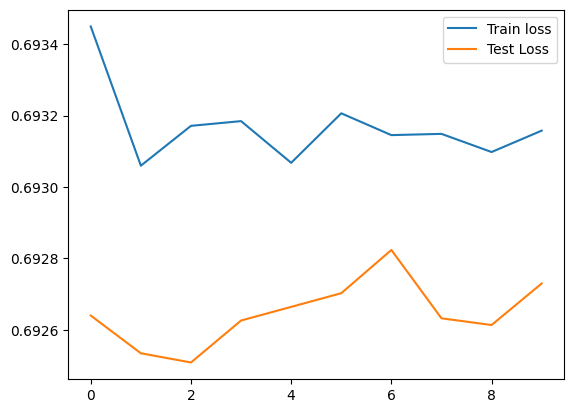

In [ ]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 2ms/step - loss: 0.6927


0.6927295327186584

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 2ms/step


0.0

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 1ms/step


0.5194401244167963

In [ ]:
# ===== Tercera version de redes neuronales =====

In [ ]:
# Agregamos una regularizacion

model = keras.Sequential([
    layers.Dense(10,
                 input_dim=input_shape,
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(4,
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1,
                 activation='sigmoid')
])

In [ ]:
# Paso 2: Compilar

model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
# Paso 3: Ajustar el modelo

history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=10)

Epoch 1/10
61/61 [==============================] - 1s 6ms/step - loss: 209.8644 - val_loss: 98.0651
Epoch 2/10
61/61 [==============================] - 0s 3ms/step - loss: 33.2545 - val_loss: 0.8329
Epoch 3/10
61/61 [==============================] - 0s 3ms/step - loss: 0.8269 - val_loss: 0.8187
Epoch 4/10
61/61 [==============================] - 0s 3ms/step - loss: 0.8140 - val_loss: 0.8071
Epoch 5/10
61/61 [==============================] - 0s 4ms/step - loss: 0.8036 - val_loss: 0.7979
Epoch 6/10
61/61 [==============================] - 0s 3ms/step - loss: 0.7952 - val_loss: 0.7904
Epoch 7/10
61/61 [==============================] - 0s 3ms/step - loss: 0.7884 - val_loss: 0.7844
Epoch 8/10
61/61 [==============================] - 0s 3ms/step - loss: 0.7830 - val_loss: 0.7796
Epoch 9/10
61/61 [==============================] - 0s 3ms/step - loss: 0.7786 - val_loss: 0.7758
Epoch 10/10
61/61 [==============================] - 0s 3ms/step - loss: 0.7752 - val_loss: 0.7727


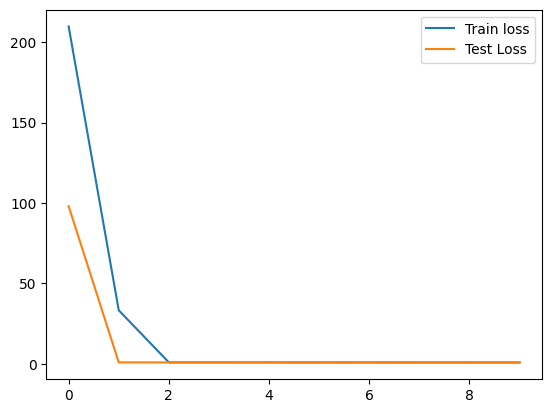

In [ ]:
# Visualizamos el resultado

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [ ]:
loss = model.evaluate(X_test, y_test)
loss

21/21 [==============================] - 0s 2ms/step - loss: 0.7727


0.7727442383766174

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred_rounded)

recall

21/21 [==============================] - 0s 2ms/step


0.0

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X_test)

# Redondear las predicciones a la clase correspondiente
y_pred_rounded = np.round(y_pred)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_rounded)

accuracy

21/21 [==============================] - 0s 2ms/step


0.5194401244167963